# Tutorial 03: Characterization of stationary points with a harmonic vibrational analysis

In this tutorial you will learn how to determine if a stationary point obtained via geometry optimization is a local minimum or a transition state. We will do this by performing a vibrational analysis.

In [1]:
import psi4

## Ammonia inversion

We will start with a very simple example. Let's go back to the ammonia molecule and optimize its structure

### Equilibrium geometry

In [2]:
psi4.set_output_file("output.nh3.dat")

geom = psi4.geometry("""
0 1
X
N 1 1.0
H 2 R 1 A
H 2 R 1 A 3 D
H 2 R 1 A 3 -D

R = 1.000
A = 120.0
D = 120.0
""")

print(geom.to_string(dtype='xyz'))

psi4.optimize('scf/def2-SVP',molecule=geom)

4
0 1 H3N
N                     0.000000000000    -0.088787078307     0.000000000000
H                    -0.433012701892     0.411212921693    -0.750000000000
H                    -0.433012701892     0.411212921693     0.750000000000
H                     0.866025403784     0.411212921693     0.000000000000

Optimizer: Optimization complete!


-56.148863715436285

In [19]:
e, wfn = psi4.frequency('scf/def2-SVP',molecule=geom,return_wfn=True)

From the wave function object (wfn) we can extract the vibrational frequencies (in cm$^{-1}$)

In [32]:
freqs = wfn.frequencies().to_array()
print(freqs)

[1135.5780164  1782.13684438 1782.13684441 3696.60925844 3824.70825886
 3824.70825888]


The results of the harmonic vibrational analysis are printed at the bottom of the output file

In [16]:
with open('output.nh3.dat','r') as f:
    lines = f.readlines()[-118:]
    print(''.join(lines))



  ==> Harmonic Vibrational Analysis <==

  non-mass-weighted Hessian:       Symmetric? True   Hermitian? True   Lin Dep Dim?  0 (0)
  projection of translations (True) and rotations (True) removed 6 degrees of freedom (6)
  total projector:                 Symmetric? True   Hermitian? True   Lin Dep Dim?  6 (6)
  mass-weighted Hessian:           Symmetric? True   Hermitian? True   Lin Dep Dim?  0 (0)
  pre-proj  low-frequency mode:    0.0000i [cm^-1]
  pre-proj  low-frequency mode:    0.0000i [cm^-1]
  pre-proj  low-frequency mode:    0.0000i [cm^-1]
  pre-proj  low-frequency mode:    0.0000i [cm^-1]
  pre-proj  low-frequency mode:    0.0000i [cm^-1]
  pre-proj  low-frequency mode:    0.0026  [cm^-1]
  pre-proj  all modes:['25.9439i' '20.8029i' '20.8029i' '0.0023i' '0.0009i' '0.0026' '1135.5780'
 '1782.1369' '1782.1369' '3696.6093' '3824.7083' '3824.7083']
  projected mass-weighted Hessian: Symmetric? True   Hermitian? True   Lin Dep Dim?  6 (6)
  post-proj low-frequency mode:    0.0

To check if a geometry is a minumum, we can write a function that tests the frequencies

### Planar geometry

Next, we will apply the vibrational analysis to the planar structure. Here we do something extra: we are going to ask psi4 to print out the normal modes to disk by setting the option `NORMAL_MODES_WRITE` to true:
```python
psi4.set_options({'NORMAL_MODES_WRITE' : True})
```

In [38]:
psi4.set_output_file("output.nh3_ts.dat")

geom = psi4.geometry("""
0 1
X
N 1 1.0
H 2 R 1 A
H 2 R 1 A 3 D
H 2 R 1 A 3 -D

R = 1.000
A = 90.0
D = 120.0
""")

psi4.set_options({'NORMAL_MODES_WRITE' : True})
print(geom.to_string(dtype='xyz'))
psi4.optimize('scf/def2-SVP',molecule=geom)
e_ts, wfn_ts = psi4.frequency('scf/def2-SVP',molecule=geom,return_wfn=True)

4
0 1 H3N
N                     0.000000000000     0.000000000000     0.000000000000
H                     0.000000000000     0.000000000000    -1.000000000000
H                     0.866025403784     0.000000000000     0.500000000000
H                    -0.866025403784     0.000000000000     0.500000000000

Optimizer: Optimization complete!


In [39]:
freqs_ts = wfn.frequencies().to_array()
print(freqs_ts)

with open('output.nh3_ts.dat','r') as f:
    lines = f.readlines()[-118:]
    print(''.join(lines))

[1135.5780164  1782.13684438 1782.13684441 3696.60925844 3824.70825886
 3824.70825888]
  ==> Harmonic Vibrational Analysis <==

  non-mass-weighted Hessian:       Symmetric? True   Hermitian? True   Lin Dep Dim?  0 (0)
  projection of translations (True) and rotations (True) removed 6 degrees of freedom (6)
  total projector:                 Symmetric? True   Hermitian? True   Lin Dep Dim?  6 (6)
  mass-weighted Hessian:           Symmetric? True   Hermitian? True   Lin Dep Dim?  0 (0)
  pre-proj  low-frequency mode:    0.0000i [cm^-1]
  pre-proj  low-frequency mode:    0.0000i [cm^-1]
  pre-proj  low-frequency mode:    0.0000i [cm^-1]
  pre-proj  low-frequency mode:    0.0012  [cm^-1]
  pre-proj  low-frequency mode:   18.3843  [cm^-1]
  pre-proj  low-frequency mode:   18.3843  [cm^-1]
  pre-proj  low-frequency mode:   18.3844  [cm^-1]
  pre-proj  all modes:['908.6689i' '0.0025i' '0.0013i' '0.0012' '18.3843' '18.3843' '18.3844'
 '1663.6482' '1663.6482' '3804.3257' '4036.9455' '4036.945

Now we can take a look at the vibrational modes. We will use the `fortecubeview` module

In [40]:
import fortecubeview
fortecubeview.vib('output.nh3_ts.default.29094.molden_normal_modes')

HTML(value='\n        <style>\n           .jupyter-widgets-output-area .output_scroll {\n                heigh…

interactive(children=(Select(description='Select:', options=('1: Imaginary mode (i908.7 cm^-1)', '2: Normal mo…

## Another example

We will now move to show a simple application of the computation of frequencies. We will optimize and compute the frequencies of acetaldehyde:

<img src="./c2h4o.png" alt="c2h4o molecule" width="150"/>

In [52]:
GApsi4.core.set_output_file('output.C2OH4.dat',False)

mol = psi4.geometry("""
C       -1.4851649825      1.0105098419     -0.0136919013                 
C       -1.4295256812     -0.4854850139      0.0016993677                 
O       -2.5145012116      1.6407920050     -0.2333702113                 
H       -0.4066169295     -0.8037578895      0.2192647845                 
H       -1.7209386966     -0.8720278934     -0.9774425038                 
H       -2.0934632091     -0.8677995447      0.7802096768                 
H       -0.5331793331      1.5302219067      0.1868246310                 
""")

psi4.set_options({'NORMAL_MODES_WRITE' : True})

psi4.optimize('scf/def2-SVP',molecule=mol)
e_2,wfn_2=psi4.frequencies('scf/def2-SVP',return_wfn=True,molecule=mol)

Optimizer: Optimization complete!


In [49]:
freqs = wfn_2.frequencies().to_array()
print(freqs)

with open('output.C2OH4.dat','r') as f:
    lines = f.readlines()[-184:]
    print(''.join(lines))

[-175.77198881  550.32623432  822.14233909 1010.65362306 1187.00263273
 1248.4341809  1490.33798982 1548.43860372 1568.39434117 1577.51793913
 2044.68163308 3116.50386038 3189.8468751  3279.43360223 3295.85877983]


  ==> Harmonic Vibrational Analysis <==

  non-mass-weighted Hessian:       Symmetric? True   Hermitian? True   Lin Dep Dim?  0 (0)
  projection of translations (True) and rotations (True) removed 6 degrees of freedom (6)
  total projector:                 Symmetric? True   Hermitian? True   Lin Dep Dim?  6 (6)
  mass-weighted Hessian:           Symmetric? True   Hermitian? True   Lin Dep Dim?  0 (0)
  pre-proj  low-frequency mode:    0.0000i [cm^-1]
  pre-proj  low-frequency mode:    0.0000i [cm^-1]
  pre-proj  low-frequency mode:    0.0000i [cm^-1]
  pre-proj  low-frequency mode:    0.0020  [cm^-1]
  pre-proj  low-frequency mode:    0.0095  [cm^-1]
  pre-proj  low-frequency mode:    0.0187  [cm^-1]
  pre-proj  low-frequency mode:    5.7440  [cm^-1]
  pre-proj  all modes:[

What mode gives the imaginary frequency?

In [50]:
fortecubeview.vib('output.C2OH4.default.29094.molden_normal_modes')

HTML(value='\n        <style>\n           .jupyter-widgets-output-area .output_scroll {\n                heigh…

interactive(children=(Select(description='Select:', options=('1: Imaginary mode (i175.8 cm^-1)', '2: Normal mo…

To find the minimum, we can rotate the C-C bond and reoptimize

In [53]:
GApsi4.core.set_output_file('output.C2OH4.2.dat',False)

mol = psi4.geometry("""
C       -1.4851649825      1.0105098419     -0.0136919013                 
C       -1.4295256812     -0.4854850139      0.0016993677                 
O       -2.1398156566      1.6485701762     -0.8318353741                 
H       -0.4066169295     -0.8037578895      0.2192647845                 
H       -1.7209386966     -0.8720278934     -0.9774425038                 
H       -2.0934632091     -0.8677995447      0.7802096768                 
H       -0.8949834415      1.5227111606      0.7647165676                 
""")

psi4.optimize('scf/def2-SVP',molecule=mol)
e_2b,wfn_2b=psi4.frequencies('scf/def2-SVP',return_wfn=True,molecule=mol)

Optimizer: Optimization complete!


In [55]:
fortecubeview.vib('output.C2OH4.2.default.29094.molden_normal_modes')

HTML(value='\n        <style>\n           .jupyter-widgets-output-area .output_scroll {\n                heigh…

interactive(children=(Select(description='Select:', options=('1: Normal mode (158.1 cm^-1)', '2: Normal mode (…

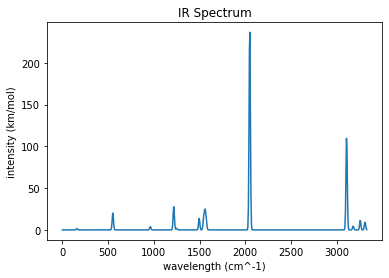

In [12]:
def plot_freqs(filename):
    """
    Function to plot the IR spectrum.

    Usage: plot_freqs(filename)

    Inputs: name of psi4 output file from SCF calculation
    filename: name

    Output: plot of the IR spectrum
    """

    import math
    import matplotlib.pyplot as plt

    with open(filename) as f:
        frequencies = []
        intensities = []        
        for line in f:
            if 'Freq [cm^-1]' in line:
                for val in [float(omega) for omega in line.split()[2:]]:
                    frequencies.append(val)
            if 'IR activ [km/mol]' in line:
                for val in [float(omega) for omega in line.split()[3:]]:
                    intensities.append(val)

    xmin = min(min(frequencies),0.0)
    xmax = max(frequencies) + 25.0
    npoints = 600
    alpha = 1.0 / 100.0
    dx = (xmax - xmin)/ float(npoints)
    xvals = [xmin + dx * i for i in range(npoints)]
    yvals = []
    for x in xvals:
        y = 0.0
        for f,i in zip(frequencies,intensities):
            y += i * math.exp(- alpha * (x - f)**2)
        yvals.append(y)

    plt.plot(xvals,yvals)
    plt.xlabel('wavelength (cm^-1)')
    plt.ylabel('intensity (km/mol)')
    plt.title('IR Spectrum')
    plt.show() 
    
plot_freqs('output.C2OH4.2.dat')   